In [1]:
#Load in the data in seperate dataframes

import pandas as pd


file_path = "lecture6p_2022.xlsx"
sheets = pd.ExcelFile(file_path)
dataframes = {}

for sheet_name in sheets.sheet_names:
    dataframes[sheet_name] = sheets.parse(sheet_name)

print(dataframes.keys())


dict_keys(['MSFT', 'INTC', 'LUV', 'MCD', 'JNJ', 'F-F_Research_Data_Factors_daily'])


In [2]:
dataframes['MSFT']

,Date,Open,High,Low,Close,AdjClose,Volume
0,1989-12-29,0.593750,0.612847,0.592014,0.604167,0.382122,77630400
1,1990-01-02,0.605903,0.616319,0.598090,0.616319,0.389807,53035200
2,1990-01-03,0.621528,0.626736,0.614583,0.619792,0.392004,113774400
3,1990-01-04,0.619792,0.638889,0.616319,0.638021,0.403533,125740800
4,1990-01-05,0.635417,0.638889,0.621528,0.622396,0.393651,69566400
...,...,...,...,...,...,...,...
8227,2022-08-25,277.329987,279.019989,274.519989,278.850006,278.850006,16583400
8228,2022-08-26,279.079987,280.339996,267.980011,268.089996,268.089996,27549300
8229,2022-08-29,265.850006,267.399994,263.850006,265.230011,265.230011,20338500
8230,2022-08-30,266.670013,267.049988,260.660004,262.970001,262.970001,22767100


In [5]:
#Date as Index

dataframes['MSFT']['Date'] = pd.to_datetime(dataframes['MSFT']['Date'])  
dataframes['MSFT'].set_index('Date', inplace=True)  

dataframes['INTC']['Date'] = pd.to_datetime(dataframes['INTC']['Date'])  
dataframes['INTC'].set_index('Date', inplace=True)  

dataframes['LUV']['Date'] = pd.to_datetime(dataframes['LUV']['Date'])  
dataframes['LUV'].set_index('Date', inplace=True)  

dataframes['MCD']['Date'] = pd.to_datetime(dataframes['MCD']['Date'])  
dataframes['MCD'].set_index('Date', inplace=True)  

dataframes['JNJ']['Date'] = pd.to_datetime(dataframes['JNJ']['Date'])  
dataframes['JNJ'].set_index('Date', inplace=True)  

dataframes['F-F_Research_Data_Factors_daily']['Date'] = pd.to_datetime(dataframes['F-F_Research_Data_Factors_daily']['Date'])  
dataframes['F-F_Research_Data_Factors_daily'].set_index('Date', inplace=True)  

In [7]:
## 1) Weekly mean and std from stock returns with annual returns and std


week_resamp_msft = dataframes['MSFT'].resample('W').last()
weekly_return_msft = week_resamp_msft.pct_change().dropna()
weekly_return_msft_mean= weekly_return_msft.iloc[:,4].mean()
weekly_return_msft_srddev=weekly_return_msft.iloc[:,4].std()
annual_return_msft=52*weekly_return_msft_mean
annual_vol_msft=(52**0.5)*weekly_return_msft_srddev


week_resamp_intc = dataframes['INTC'].resample('W').last()
weekly_return_intc = week_resamp_intc.pct_change().dropna()
weekly_return_intc_mean= weekly_return_intc.iloc[:,4].mean()
weekly_return_intc_srddev=weekly_return_intc.iloc[:,4].std()
annual_return_intc=52*weekly_return_intc_mean
annual_vol_intc=(52**0.5)*weekly_return_intc_srddev


week_resamp_luv = dataframes['LUV'].resample('W').last()
weekly_return_luv = week_resamp_luv.pct_change().dropna()
weekly_return_luv_mean= weekly_return_luv.iloc[:,4].mean()
weekly_return_luv_srddev=weekly_return_luv.iloc[:,4].std()
annual_return_luv=52*weekly_return_luv_mean
annual_vol_luv=(52**0.5)*weekly_return_luv_srddev



week_resamp_mcd = dataframes['MCD'].resample('W').last()
weekly_return_mcd = week_resamp_mcd.pct_change().dropna()
weekly_return_mcd_mean= weekly_return_mcd.iloc[:,4].mean()
weekly_return_mcd_srddev=weekly_return_mcd.iloc[:,4].std()
annual_return_mcd=52*weekly_return_mcd_mean
annual_vol_mcd=(52**0.5)*weekly_return_mcd_srddev



week_resamp_jnj = dataframes['JNJ'].resample('W').last()
weekly_return_jnj = week_resamp_jnj.pct_change().dropna()
weekly_return_jnj_mean= weekly_return_jnj.iloc[:,4].mean()
weekly_return_jnj_srddev=weekly_return_jnj.iloc[:,4].std()
annual_return_jnj=52*weekly_return_jnj_mean
annual_vol_jnj=(52**0.5)*weekly_return_jnj_srddev


In [9]:
#resample and calculate annual return by year


year_resamp_msft = dataframes['MSFT'].resample('YE').last()
year_return_msft = year_resamp_msft.pct_change().dropna()

year_resamp_intc = dataframes['INTC'].resample('YE').last()
year_return_intc = year_resamp_intc.pct_change().dropna()

year_resamp_luv = dataframes['LUV'].resample('YE').last()
year_return_luv = year_resamp_luv.pct_change().dropna()

year_resamp_mcd = dataframes['MCD'].resample('YE').last()
year_return_mcd = year_resamp_mcd.pct_change().dropna()

year_resamp_jnj = dataframes['JNJ'].resample('YE').last()
year_return_jnj = year_resamp_jnj.pct_change().dropna()

In [11]:
# Correlation Matrix

corr_msft=year_return_msft.iloc[:,4]
corr_intc=year_return_intc.iloc[:,4]
corr_luv=year_return_luv.iloc[:,4]
corr_mcd=year_return_mcd.iloc[:,4]
corr_jnj=year_return_jnj.iloc[:,4]

correlation_df = pd.DataFrame({
    "MSFT": corr_msft,
    "INTC": corr_intc,
    "LUV": corr_luv,
    "MCD": corr_mcd,
    "JNJ": corr_jnj
})

corr_matrix_stocks = correlation_df.corr()

In [13]:
corr_matrix_stocks

,MSFT,INTC,LUV,MCD,JNJ
MSFT,1.000000,0.508550,0.104293,0.238358,0.634461
INTC,0.508550,1.000000,0.295793,0.474056,0.228505
LUV,0.104293,0.295793,1.000000,0.085148,0.343884
MCD,0.238358,0.474056,0.085148,1.000000,0.258915
JNJ,0.634461,0.228505,0.343884,0.258915,1.000000


In [15]:
correlation_df


,MSFT,INTC,LUV,MCD,JNJ
Date,,,,,
1990-12-31,0.729882,0.115941,0.100136,-0.146487,0.234055
1991-12-31,1.217607,0.272728,0.957425,0.318919,0.623145
1992-12-31,0.151124,0.778160,0.733309,0.294350,-0.101890
1993-12-31,-0.055637,0.430598,0.903023,0.178653,-0.089670
1994-12-31,0.516280,0.034014,-0.551172,0.034584,0.250516
1995-12-31,0.435582,0.781606,0.375632,0.553734,0.591233
1996-12-31,0.883191,1.312993,-0.042017,0.011646,0.181036
1997-12-31,0.564296,0.074499,0.681928,0.059267,0.342933
1998-12-31,1.146035,0.690367,0.384032,0.617679,0.289808


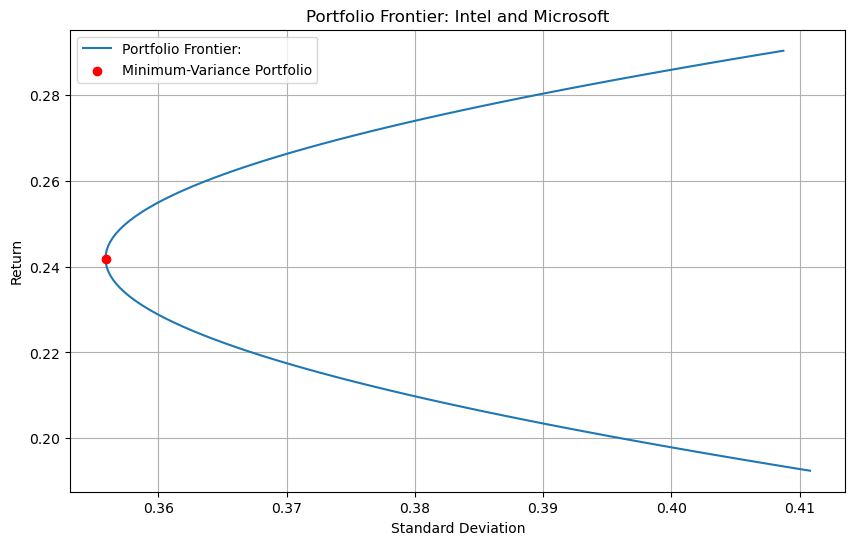

In [17]:
# Mean-Variance Frontier for Intel-Microsoft Combination

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


mean_return_msft= year_return_msft.iloc[:,4].mean()
mean_return_intc=year_return_intc.iloc[:,4].mean()

std_return_msft= year_return_msft.iloc[:,4].std()
std_return_intc=year_return_intc.iloc[:,4].std()

# cov(msft, intc) = rho(msft,intc)*stddev(msft)*std(intc)
# rho(msft,intc) from correlation matrix calculated in 1)

cov_msft_intc = corr_matrix_stocks.loc['MSFT', 'INTC']* std_return_msft * std_return_intc


w_msft = np.linspace(0, 1, 100)

msft_intc_returns = []
msft_intc_std = []

# Calculate portfolio return and risk for each weight
for w_m in w_msft:
    w_i = 1 - w_m
    # Portfolio return
    msft_intc_return = w_m * mean_return_msft + w_i * mean_return_intc
    msft_intc_returns.append(msft_intc_return)
    
    # Portfolio variance slide 7 lec6
    portfolio_variance = ((w_m**2) * (std_return_msft**2) + (w_i**2) * (std_return_intc**2) + (2 * w_m * w_i * cov_msft_intc))
    msft_intc_std.append(np.sqrt(portfolio_variance))

# Find the minimum-variance portfolio
min_variance = np.argmin( msft_intc_std)
min_risk_return = msft_intc_returns[min_variance]
min_risk_std =  msft_intc_std[min_variance]

# Plot the mean-variance frontier
plt.figure(figsize=(10, 6))
plt.plot( msft_intc_std, msft_intc_returns, label="Portfolio Frontier:")
plt.scatter(min_risk_std, min_risk_return, color='red', label="Minimum-Variance Portfolio", zorder=5)

plt.title("Portfolio Frontier: Intel and Microsoft")
plt.xlabel("Standard Deviation")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

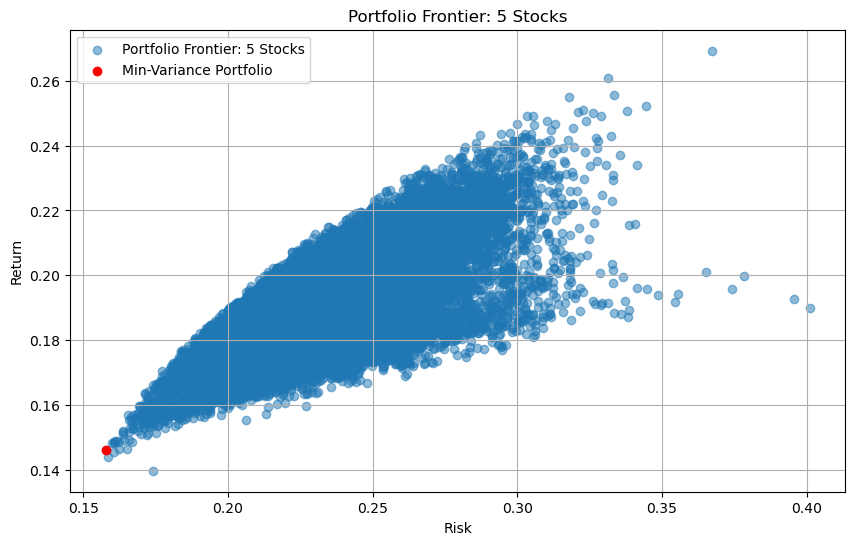

In [19]:
n= 5
err= np.array([year_return_msft.iloc[:,4].mean(),year_return_intc.iloc[:,4].mean(), year_return_luv.iloc[:,4].mean(),year_return_mcd.iloc[:,4].mean(),
             year_return_jnj.iloc[:,4].mean()])
sigmarr= np.array([year_return_msft.iloc[:,4].std(),year_return_intc.iloc[:,4].std(), year_return_luv.iloc[:,4].std(),year_return_mcd.iloc[:,4].std(),
             year_return_jnj.iloc[:,4].std()])

corr= corr_matrix_stocks

# Correlation matrix to Covariance matrix

d_std=np.diag(sigmarr)

covariance_matrix5=np.dot(np.dot(d_std,corr),d_std)



# randomly generate 5 weights n times. the sum of the 5 weights have to equal 1
np.random.seed(36)
num_portfolios = 20000
num_assets = 5

# Generate random weights and normalize them to sum to 1
weights = np.random.rand(num_portfolios, num_assets)
weights /= weights.sum(axis=1, keepdims=True)  # Normalize each row to sum to 1

return_5 = []
std_5 = []

for weight in weights:
    return_5.append(np.dot(weight, err))
    std_5.append(np.sqrt(np.dot(weight.T, np.dot(covariance_matrix5, weight))))


# Find the minimum-variance portfolio
min_variance5 = np.argmin(std_5)
min_risk_return5 = return_5[min_variance5]
min_risk_std5 = std_5[min_variance5]

# Plot the mean-variance frontier
plt.figure(figsize=(10, 6))
plt.scatter(std_5, return_5, alpha=0.5, label="Portfolio Frontier: 5 Stocks")
plt.scatter(min_risk_std5, min_risk_return5, color='red', label="Min-Variance Portfolio", zorder=5)
plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("Portfolio Frontier: 5 Stocks")
plt.legend()
plt.grid(True)
plt.show()


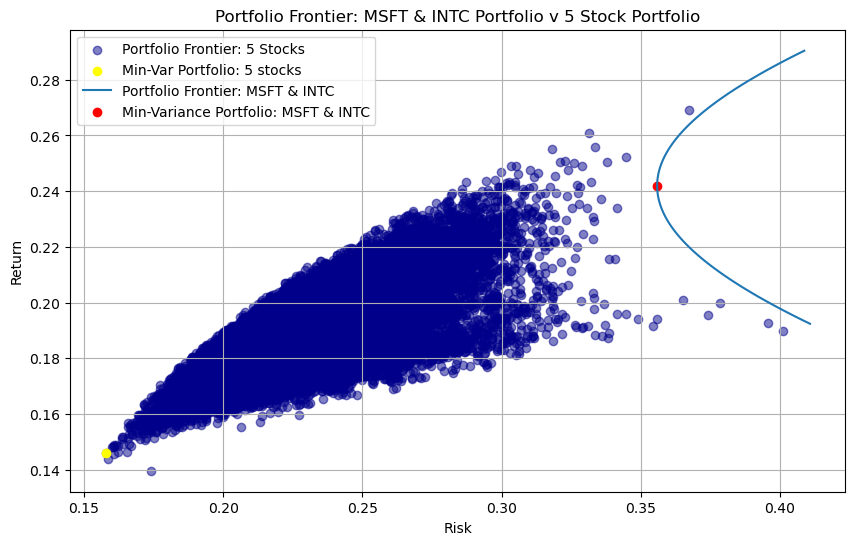

In [21]:
# Combined Plot: Portfolio of 2 Stocks vs Portfolio of 5 Stocks

plt.figure(figsize=(10, 6))
plt.scatter(std_5, return_5, alpha=0.5, color = 'darkblue', label="Portfolio Frontier: 5 Stocks")
plt.scatter(min_risk_std5, min_risk_return5, color='yellow', label="Min-Var Portfolio: 5 stocks")
plt.plot( msft_intc_std, msft_intc_returns, label="Portfolio Frontier: MSFT & INTC")
plt.scatter(min_risk_std, min_risk_return, color='red', label="Min-Variance Portfolio: MSFT & INTC")
plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("Portfolio Frontier: MSFT & INTC Portfolio v 5 Stock Portfolio")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The efficient frontier would be the top half for each of the 2 curves: dark blue and light blue. 
# Bottom half is ommited as for the same risk(std dev) you get a lower return


In [ ]:
# Add riskless asset and create tangent portfolio for the 2 and 5 stock portfolios

In [23]:
#Risk free rate

df_rf = dataframes['F-F_Research_Data_Factors_daily']
daily_rf=df_rf.iloc[:,3]
daily_rf

Date
1989-12-29    0.030
1990-01-02    0.026
1990-01-03    0.026
1990-01-04    0.026
1990-01-05    0.026
              ...  
2022-09-26    0.009
2022-09-27    0.009
2022-09-28    0.009
2022-09-29    0.009
2022-09-30    0.009
Name: RF, Length: 8253, dtype: float64

In [25]:
yearly_rf=((daily_rf/100+1)**252)-1
yearly_rf

Date
1989-12-29    0.078519
1990-01-02    0.067705
1990-01-03    0.067705
1990-01-04    0.067705
1990-01-05    0.067705
                ...   
2022-09-26    0.022938
2022-09-27    0.022938
2022-09-28    0.022938
2022-09-29    0.022938
2022-09-30    0.022938
Name: RF, Length: 8253, dtype: float64

In [27]:
avg_yearlyRFrate=yearly_rf.mean()
avg_yearlyRFrate

0.025393263096557026

In [29]:
##PLot of 2 stocks
msft_intc_std, msft_intc_returns


sharpe_2 = (msft_intc_returns-avg_yearlyRFrate)/ (msft_intc_std)
value_2= max(sharpe_2)
index2=np.argmax(sharpe_2)
value_2

0.6544936765557222

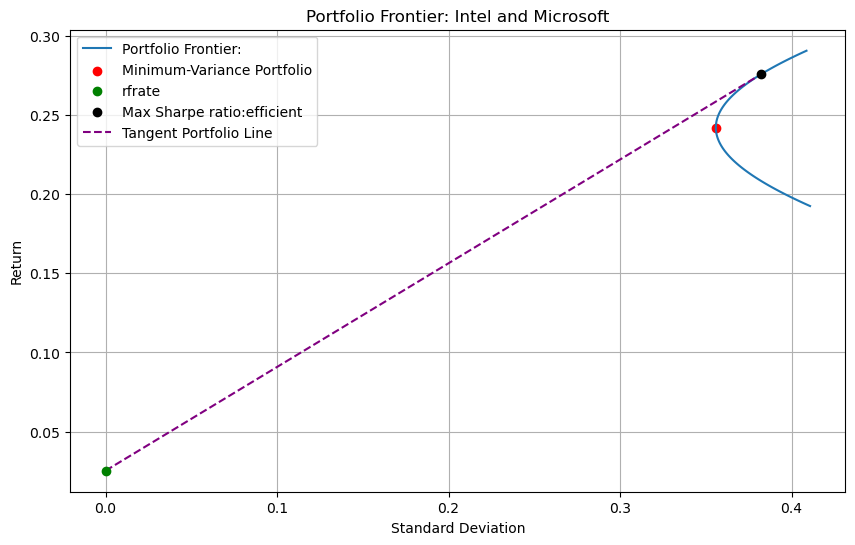

In [31]:
plt.figure(figsize=(10, 6))
plt.plot( msft_intc_std, msft_intc_returns, label="Portfolio Frontier:")
plt.scatter(min_risk_std, min_risk_return, color='red', label="Minimum-Variance Portfolio")
plt.scatter(0, avg_yearlyRFrate, color='green', label="rfrate", zorder=5)
plt.scatter(msft_intc_std[index2], msft_intc_returns[index2], color='black', label="Max Sharpe ratio:efficient", zorder=5)
plt.plot([0, msft_intc_std[index2]], [avg_yearlyRFrate, msft_intc_returns[index2]],color='purple', linestyle='--', label="Tangent Portfolio Line")
plt.title("Portfolio Frontier: Intel and Microsoft")
plt.xlabel("Standard Deviation")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# 5 Stock Portfolio

sharpe_5 = ( return_5-avg_yearlyRFrate)/ (std_5)
value_5= max(sharpe_5)
index5=np.argmax(sharpe_5)
value_5


0.823200125662402

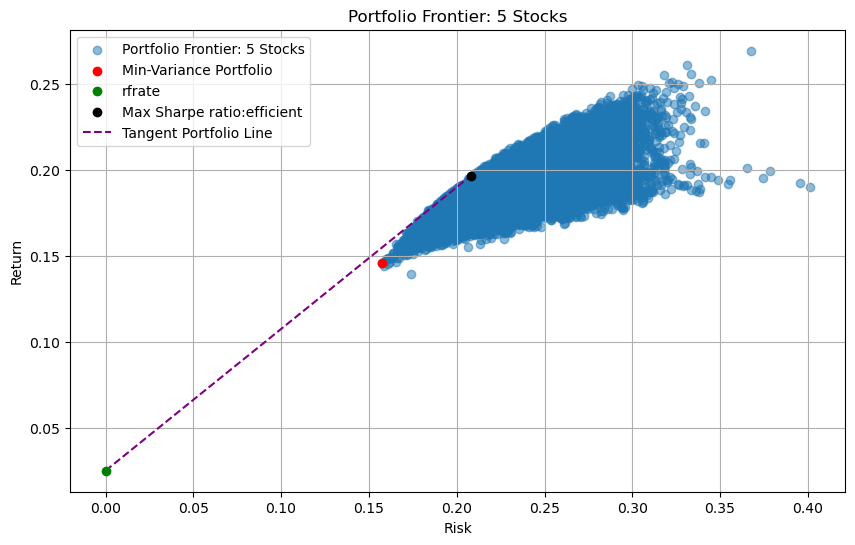

In [35]:
# 5 Stock Portfolio





# Plot the mean-variance frontier
plt.figure(figsize=(10, 6))
plt.scatter(std_5, return_5, alpha=0.5, label="Portfolio Frontier: 5 Stocks")
plt.scatter(min_risk_std5, min_risk_return5, color='red', label="Min-Variance Portfolio", zorder=5)
plt.scatter(0, avg_yearlyRFrate, color='green', label="rfrate", zorder=5)
plt.scatter(std_5[index5], return_5[index5], color='black', label="Max Sharpe ratio:efficient", zorder=5)
plt.plot([0,std_5[index5]], [avg_yearlyRFrate, return_5[index5]],color='purple', linestyle='--', label="Tangent Portfolio Line")
plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("Portfolio Frontier: 5 Stocks")
plt.legend()
plt.grid(True)
plt.show()
